# PRODIGY TASK-04

# THILAK SAI K (DATA SCIENCE INTERN)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('task_4_dataset.csv')

In [3]:
df

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df.dtypes

ID            int64
Topic        object
Sentiment    object
Tweet        object
dtype: object

In [6]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


# Checking for duplicates and null values

In [8]:
df.duplicated().sum()

2701

In [9]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Tweet        326
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

# Analyze and visualize Sentiment patterns

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the number of tweets per sentiment category per topic
sc = df.groupby(['Topic', 'Sentiment']).size().reset_index(name='counts')
sc

,Topic,Sentiment,counts
0,Amazon,Irrelevant,185
1,Amazon,Negative,565
2,Amazon,Neutral,1197
3,Amazon,Positive,302
4,ApexLegends,Irrelevant,185
...,...,...,...
123,Xbox(Xseries),Positive,743
124,johnson&johnson,Irrelevant,192
125,johnson&johnson,Negative,809
126,johnson&johnson,Neutral,1004


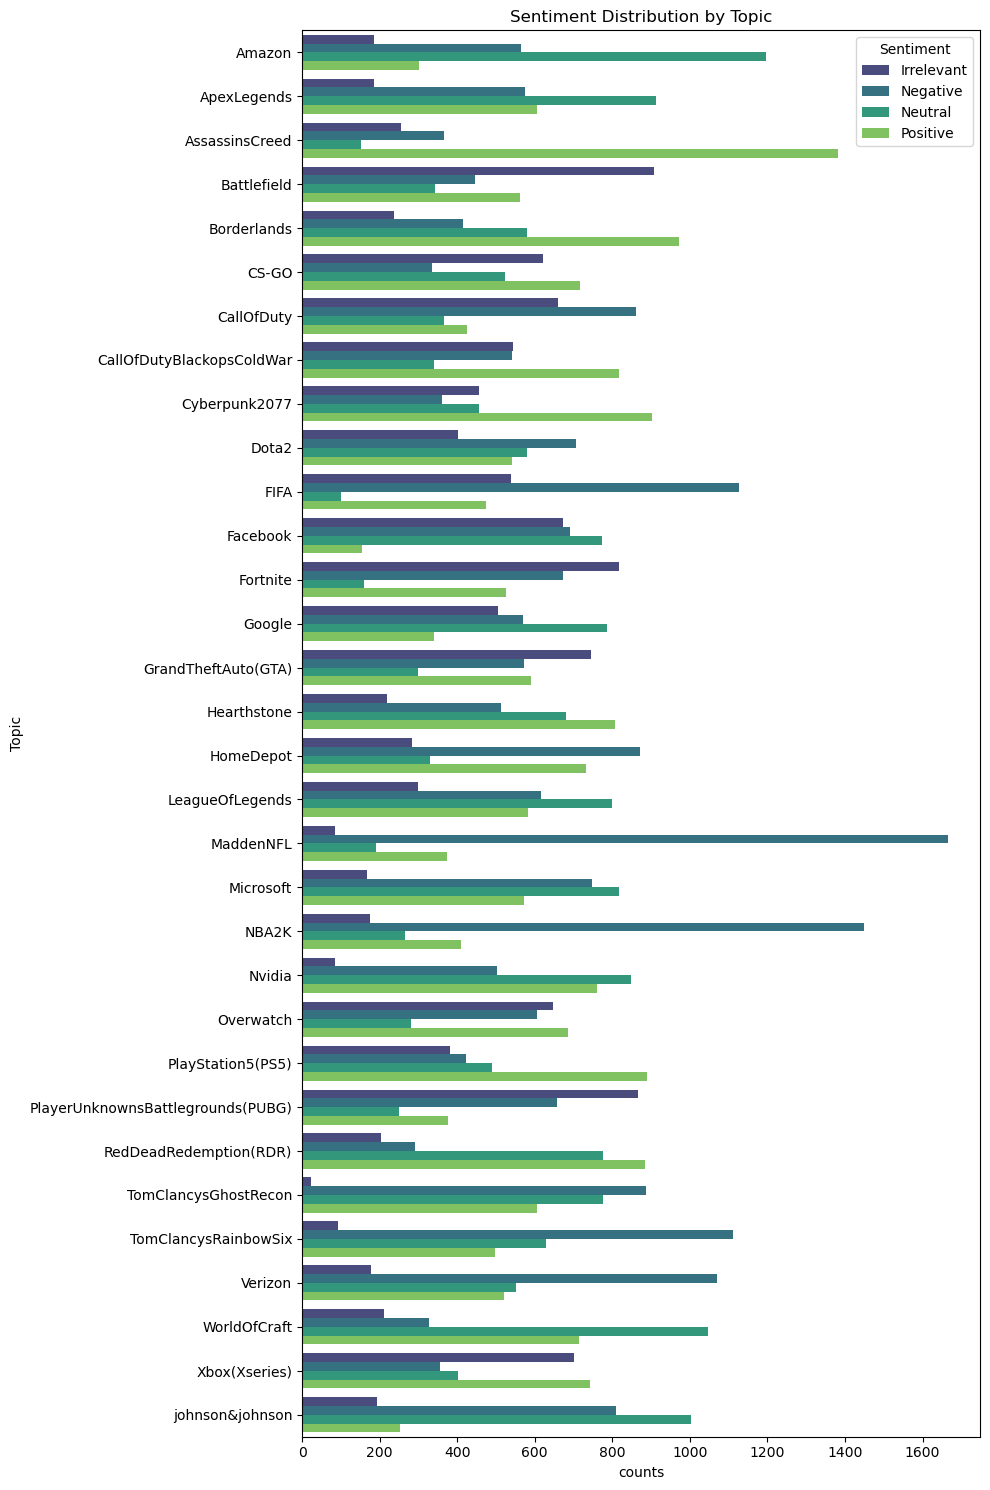

In [13]:
# Plotting sentiment distribution for each topic 
plt.figure(figsize=(10,15))
sns.barplot(y='Topic', x='counts', hue='Sentiment', data=sc,palette='viridis', orient='h')
plt.title('Sentiment Distribution by Topic')
plt.tight_layout()
plt.show()

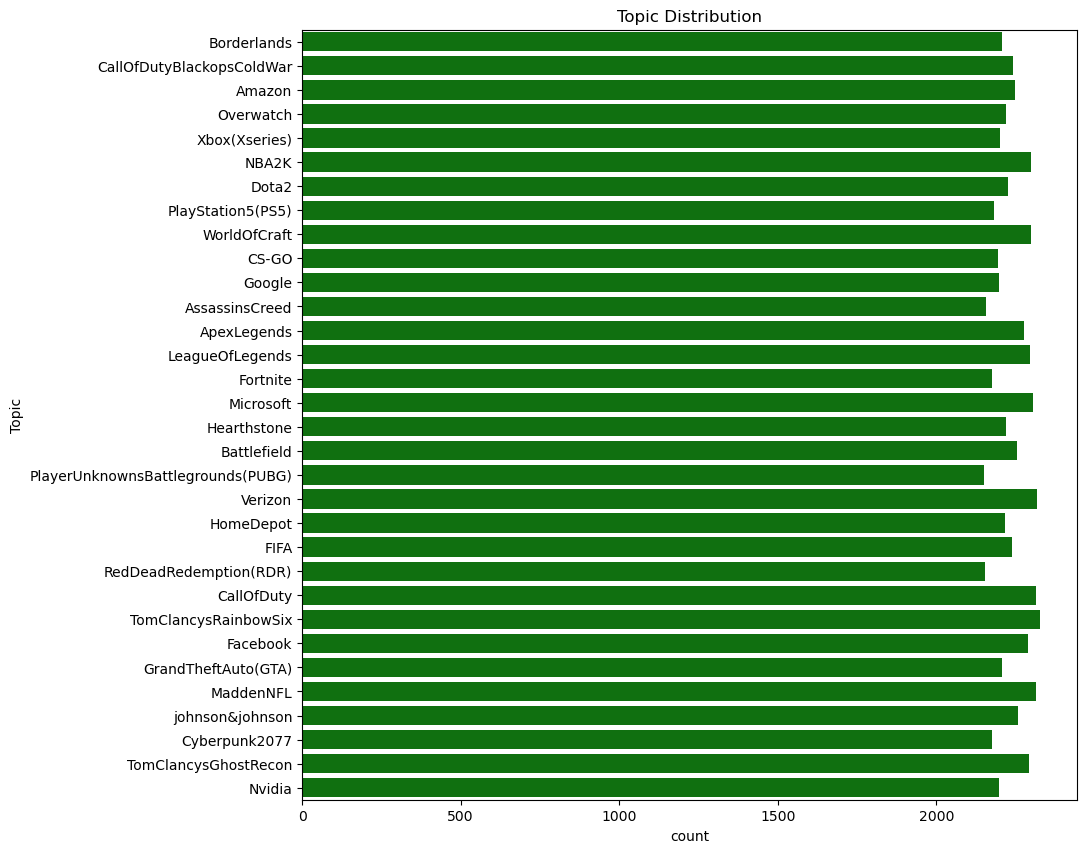

In [14]:
# visualization for Topic distribution
plt.figure(figsize=(10,10))
sns.countplot(y='Topic',data=df,color='g')
plt.title("Topic Distribution")
plt.show()

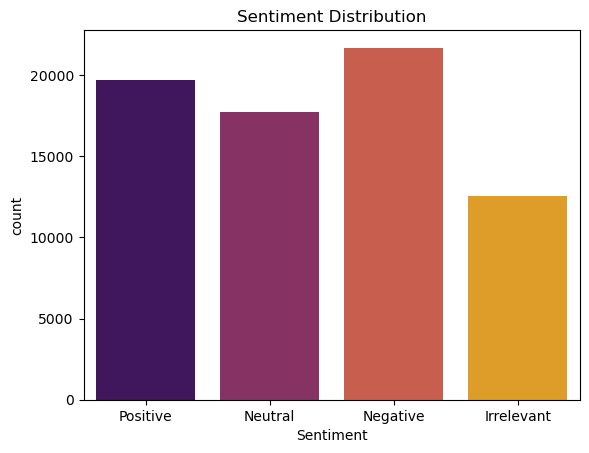

In [15]:
#Barplot for sentiment Distribution
sns.countplot(x='Sentiment',data=df,palette='inferno')
plt.title("Sentiment Distribution")
plt.show()

In [16]:
# Select top 5 topics
tc=df['Topic'].value_counts().nlargest(5).index
top= sc[sc['Topic'].isin(tc)]

# Top Five Negative Sentiments Topics

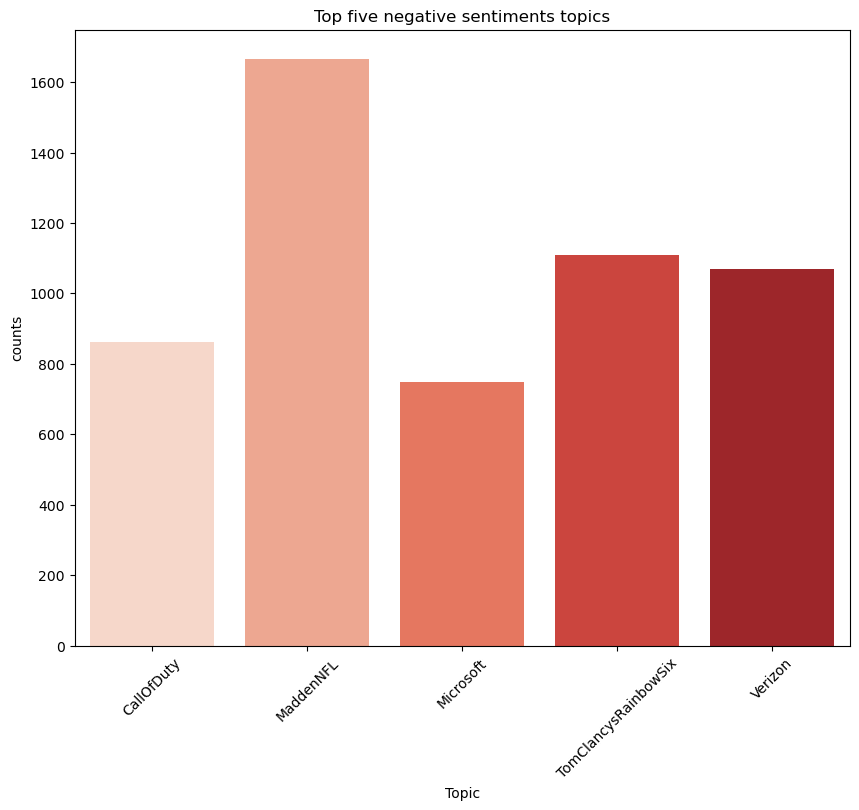

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='Topic',y='counts',data=top[top["Sentiment"]=='Negative'],palette='Reds')
plt.xticks(rotation=45)
plt.title("Top five negative sentiments topics")
plt.show()

# Top Five positive Sentiments Topics


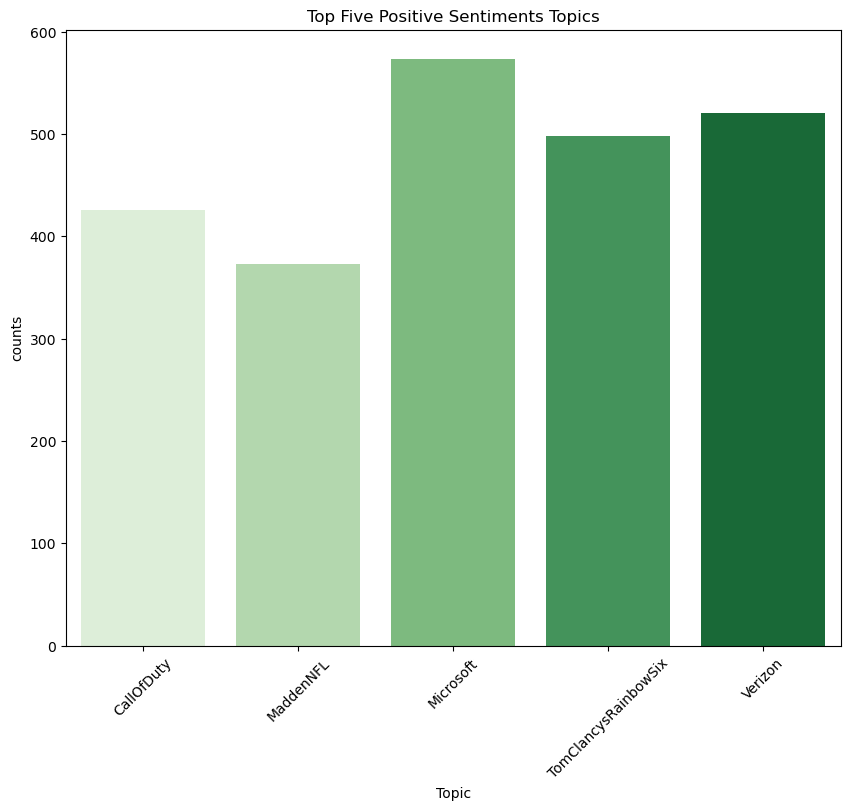

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y='counts',data=top[top["Sentiment"]=='Positive'],palette="Greens")
plt.title("Top Five Positive Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

# Top Five Neutral Sentiments Topics

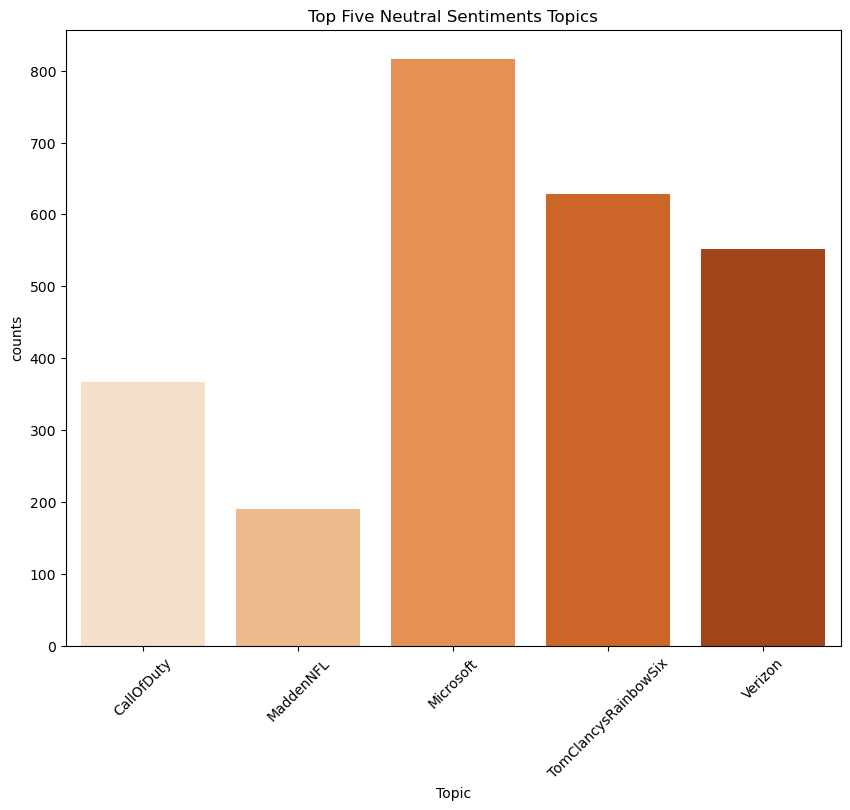

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y="counts",data=top[top["Sentiment"]=="Neutral"],palette='Oranges')
plt.title("Top Five Neutral Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

# Top Five Irrelevant Sentiments Topics

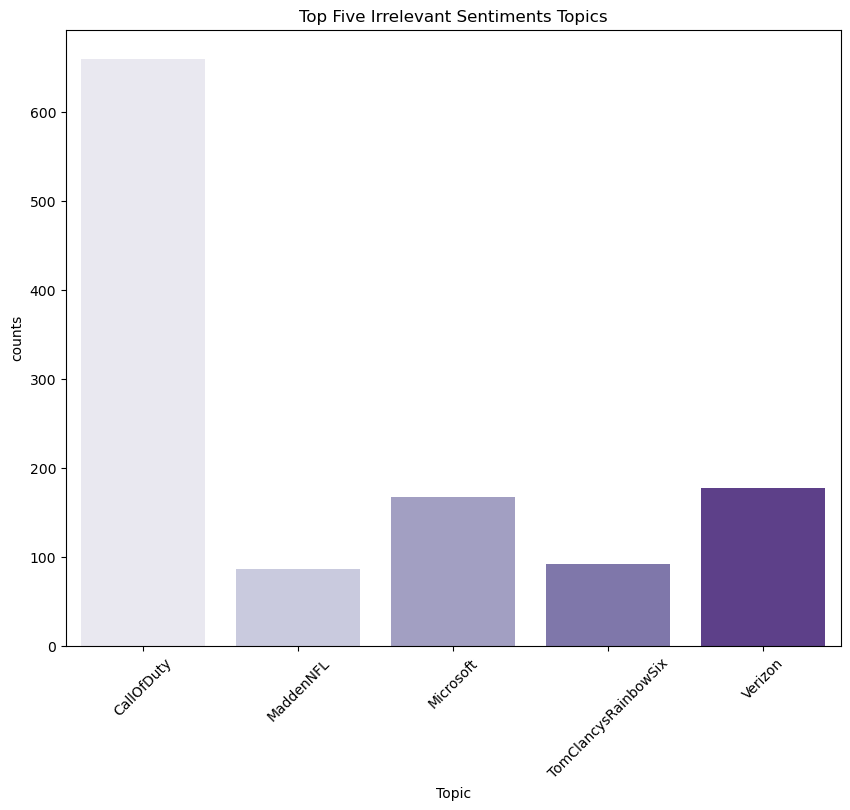

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x="Topic",y="counts",data=top[top["Sentiment"]=="Irrelevant"],palette='Purples')
plt.title("Top Five Irrelevant Sentiments Topics")
plt.xticks(rotation=45)
plt.show()

# Heatmap of Topic vs Sentiment


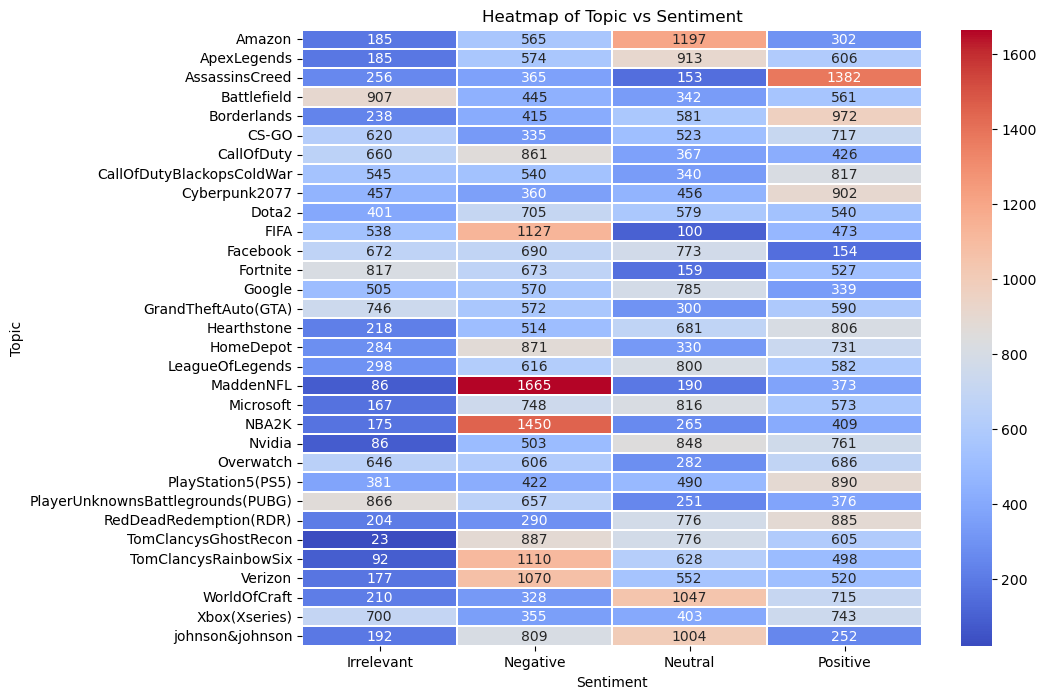

In [21]:
# Create the crosstab for categorical variables
crosstab = pd.crosstab(index=df['Topic'], columns=df['Sentiment'])

plt.figure(figsize=(10,8))
sns.heatmap(crosstab,cmap='coolwarm',annot=True, fmt='d', linewidths=.1)
plt.title('Heatmap of Topic vs Sentiment')
plt.show()

# Word Clouds for Each Sentiment

In [23]:
from wordcloud import WordCloud

# Generate word clouds
pst_text = ' '.join(df[df['Sentiment'] == 'Positive']['Tweet'])
neg_text = ' '.join(df[df['Sentiment'] == 'Negative']['Tweet'])
neu_text = ' '.join(df[df['Sentiment'] == 'Neutral']['Tweet'])
irr_text = ' '.join(df[df["Sentiment"]== 'Irrelevant']['Tweet'])

In [24]:
# Create word clouds
wc_pst = WordCloud(width=800, height=400).generate(pst_text)
wc_neg = WordCloud(width=800, height=400).generate(neg_text)
wc_neu = WordCloud(width=800, height=400).generate(neu_text)
wc_irr = WordCloud(width=800, height= 400).generate(irr_text)

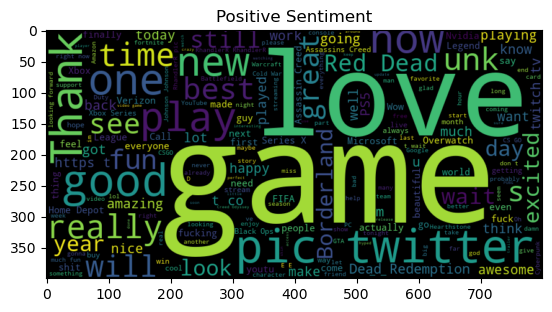

In [25]:
# For positive Sentiment
plt.imshow(wc_pst, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.show()

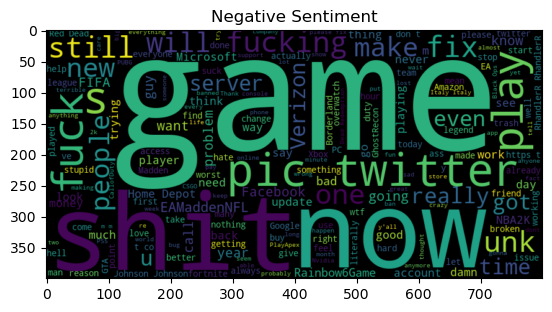

In [26]:
# For negative sentiment
plt.imshow(wc_neg,interpolation='bilinear')
plt.title('Negative Sentiment')
plt.show()

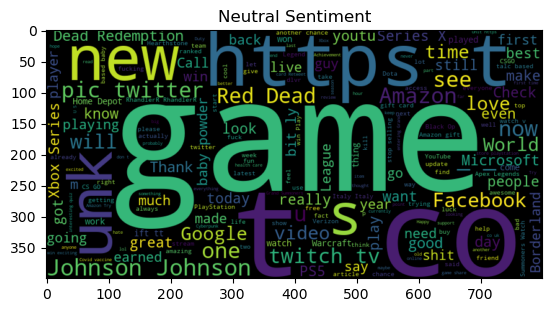

In [27]:
# For neutral sentiment
plt.imshow(wc_neu,interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.show()

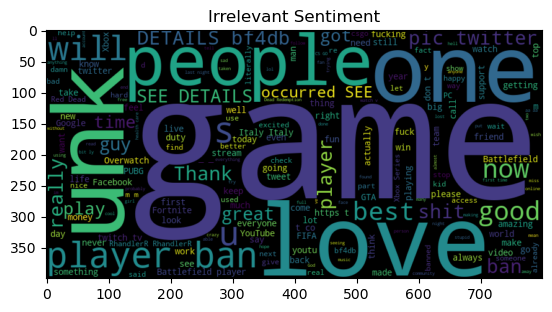

In [28]:
# For Irrelevant Sentiment
plt.imshow(wc_irr,interpolation='bilinear')
plt.title('Irrelevant Sentiment')
plt.show()